# ** heatmap ** 

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np 
import matplotlib.patches as mpatches
import numpy as np 
import copy
import json
import pandas as pd
import math
from datetime import datetime

In [2]:
plt.style.use("seaborn-darkgrid")

In [62]:
#initial half model 
model = {'AAG': [0.35645079041305455, {'ATG': 0.15259895088221268, 'ACG': 0.2341440152598951, 'AGG': 0.6132570338578922}], 'GAC': [0.38170347003154576, {'GGC': 0.581267217630854, 'GCC': 0.17447199265381083, 'GTC': 0.24426078971533516}], 'TCA': [0.44338655339094774, {'TGA': 0.2484307895606211, 'TTA': 0.6247109349190618, 'TAA': 0.12685827552031714}], 'CCA': [0.4589957500393515, {'CAA': 0.10185185185185185, 'CTA': 0.6903292181069959, 'CGA': 0.20781893004115226}], 'GCC': [0.5527913809990206, {'GGC': 0.1630049610205528, 'GAC': 0.23848334514528702, 'GTC': 0.5985116938341601}], 'CCT': [0.5123493090267568, {'CTT': 0.6662840746054519, 'CGT': 0.22955523672883785, 'CAT': 0.10416068866571017}], 'GCA': [0.49819102749638206, {'GGA': 0.15359477124183007, 'GTA': 0.6016702977487292, 'GAA': 0.24473493100944083}], 'TAA': [0.3860215053763441, {'TGA': 0.5678471945881417, 'TTA': 0.22682053322721846, 'TCA': 0.20533227218463987}], 'ACT': [0.5261127596439169, {'AGT': 0.24844895657078397, 'AAT': 0.1551043429216018, 'ATT': 0.5964467005076142}], 'TAT': [0.544423228125351, {'TCT': 0.07654219104600785, 'TGT': 0.8021456571074892, 'TTT': 0.12131215184650299}], 'CAG': [0.4073735527117611, {'CGG': 0.6428571428571429, 'CCG': 0.20905011219147346, 'CTG': 0.1480927449513837}], 'AAA': [0.3198252625708709, {'AGA': 0.5239755884917175, 'ATA': 0.17988956698634118, 'ACA': 0.2961348445219413}], 'CCG': [0.943577893317928, {'CAG': 0.01, 'CGG': 0.04673469387755102, 'CTG': 0.943265306122449}], 'CAA': [0.36173285198555954, {'CCA': 0.28493013972055886, 'CTA': 0.13822355289421157, 'CGA': 0.5768463073852296}], 'ACA': [0.5516478655164787, {'AGA': 0.17802726543704891, 'ATA': 0.6555733761026463, 'AAA': 0.16639935846030474}], 'GCT': [0.5081906865451868, {'GAT': 0.16334661354581673, 'GGT': 0.20101412531691415, 'GTT': 0.6356392611372691}], 'CAC': [0.3995351785336996, {'CCC': 0.20359598096245374, 'CTC': 0.18244315177154943, 'CGC': 0.6139608672659969}], 'ACG': [0.9583888149134487, {'ATG': 0.922542549496353, 'AAG': 0.04341785342132685, 'AGG': 0.03403959708232025}], 'GAG': [0.3202682875707399, {'GTG': 0.23036649214659685, 'GGG': 0.5530104712041884, 'GCG': 0.21662303664921467}], 'AAT': [0.48758198043221157, {'ACT': 0.1133406835722161, 'AGT': 0.7592061742006616, 'ATT': 0.1274531422271224}], 'GCG': [0.9428571428571428, {'GTG': 0.9054178145087236, 'GGG': 0.027548209366391185, 'GAG': 0.06703397612488522}], 'CCC': [0.5453669813138123, {'CTC': 0.6450017661603674, 'CAC': 0.11974567290709998, 'CGC': 0.2352525609325327}], 'ACC': [0.6345660930062248, {'ATC': 0.532602423542989, 'AAC': 0.3147720715522216, 'AGC': 0.15262550490478938}], 'TCT': [0.4717741935483871, {'TGT': 0.34816490698843644, 'TAT': 0.1757164404223228, 'TTT': 0.47611865258924085}], 'TCG': [0.9197916666666667, {'TGG': 0.052095130237825596, 'TAG': 0.026896942242355604, 'TTG': 0.9210079275198187}], 'AAC': [0.3978541712283775, {'AGC': 0.6692350027517887, 'ACC': 0.17776554760594387, 'ATC': 0.15299944964226747}], 'GAT': [0.4466903598400711, {'GCT': 0.11636001989060167, 'GGT': 0.5862754848334162, 'GTT': 0.2973644952759821}], 'TAG': [0.38808618504435993, {'TGG': 0.6962769431743958, 'TCG': 0.16525146962769433, 'TTG': 0.13847158719790986}], 'GAA': [0.30323054331864907, {'GGA': 0.5617433414043583, 'GTA': 0.19915254237288135, 'GCA': 0.2391041162227603}], 'CAT': [0.5741935483870968, {'CGT': 0.716724286949006, 'CTT': 0.1497407087294728, 'CCT': 0.13353500432152118}], 'TCC': [0.5196784458214705, {'TGC': 0.22687721559780857, 'TTC': 0.602964872703835, 'TAC': 0.17015791169835642}], 'TAC': [0.4143262045864468, {'TGC': 0.7276119402985075, 'TTC': 0.1455223880597015, 'TCC': 0.12686567164179105}]}
#doubled model 
model = {'GTC': [0.38170347003154576, {'GCC': 0.581267217630854, 'GGC': 0.17447199265381083, 'GAC': 0.24426078971533516}], 'TGA': [0.44338655339094774, {'TAA': 0.6247109349190618, 'TTA': 0.12685827552031714, 'TCA': 0.2484307895606211}], 'TAT': [0.544423228125351, {'TTT': 0.12131215184650299, 'TGT': 0.8021456571074892, 'TCT': 0.07654219104600785}], 'CGC': [0.9428571428571428, {'CTC': 0.06703397612488522, 'CCC': 0.027548209366391185, 'CAC': 0.9054178145087236}], 'ATT': [0.48758198043221157, {'AGT': 0.1133406835722161, 'ACT': 0.7592061742006616, 'AAT': 0.1274531422271224}], 'GCA': [0.49819102749638206, {'GTA': 0.6016702977487292, 'GAA': 0.24473493100944083, 'GGA': 0.15359477124183007}], 'CGT': [0.9583888149134487, {'CTT': 0.04341785342132685, 'CCT': 0.03403959708232025, 'CAT': 0.922542549496353}], 'CCA': [0.4589957500393515, {'CTA': 0.6903292181069959, 'CGA': 0.20781893004115226, 'CAA': 0.10185185185185185}], 'GGA': [0.5196784458214705, {'GTA': 0.17015791169835642, 'GAA': 0.602964872703835, 'GCA': 0.22687721559780857}], 'AAA': [0.3198252625708709, {'ACA': 0.2961348445219413, 'ATA': 0.17988956698634118, 'AGA': 0.5239755884917175}], 'AAC': [0.3978541712283775, {'ACC': 0.17776554760594387, 'AGC': 0.6692350027517887, 'ATC': 0.15299944964226747}], 'CTC': [0.3202682875707399, {'CGC': 0.21662303664921467, 'CCC': 0.5530104712041884, 'CAC': 0.23036649214659685}], 'AGG': [0.5123493090267568, {'ACG': 0.22955523672883785, 'AAG': 0.6662840746054519, 'ATG': 0.10416068866571017}], 'AGA': [0.4717741935483871, {'ACA': 0.34816490698843644, 'AAA': 0.47611865258924085, 'ATA': 0.1757164404223228}], 'AGC': [0.5081906865451868, {'ACC': 0.20101412531691415, 'AAC': 0.6356392611372691, 'ATC': 0.16334661354581673}], 'CAA': [0.36173285198555954, {'CTA': 0.13822355289421157, 'CGA': 0.5768463073852296, 'CCA': 0.28493013972055886}], 'CTT': [0.35645079041305455, {'CGT': 0.2341440152598951, 'CCT': 0.6132570338578922, 'CAT': 0.15259895088221268}], 'CAC': [0.3995351785336996, {'CCC': 0.20359598096245374, 'CTC': 0.18244315177154943, 'CGC': 0.6139608672659969}], 'TAG': [0.38808618504435993, {'TCG': 0.16525146962769433, 'TGG': 0.6962769431743958, 'TTG': 0.13847158719790986}], 'ACA': [0.5516478655164787, {'ATA': 0.6555733761026463, 'AGA': 0.17802726543704891, 'AAA': 0.16639935846030474}], 'CTG': [0.4073735527117611, {'CGG': 0.20905011219147346, 'CAG': 0.1480927449513837, 'CCG': 0.6428571428571429}], 'ACT': [0.5261127596439169, {'AGT': 0.24844895657078397, 'ATT': 0.5964467005076142, 'AAT': 0.1551043429216018}], 'TTA': [0.3860215053763441, {'TGA': 0.20533227218463987, 'TAA': 0.22682053322721846, 'TCA': 0.5678471945881417}], 'CGA': [0.9197916666666667, {'CTA': 0.026896942242355604, 'CAA': 0.9210079275198187, 'CCA': 0.052095130237825596}], 'GTA': [0.4143262045864468, {'GGA': 0.12686567164179105, 'GAA': 0.1455223880597015, 'GCA': 0.7276119402985075}], 'GGC': [0.5527913809990206, {'GCC': 0.1630049610205528, 'GTC': 0.23848334514528702, 'GAC': 0.5985116938341601}], 'AGT': [0.5261127596439169, {'ATT': 0.1551043429216018, 'ACT': 0.24844895657078397, 'AAT': 0.5964467005076142}], 'AAT': [0.48758198043221157, {'AGT': 0.7592061742006616, 'ATT': 0.1274531422271224, 'ACT': 0.1133406835722161}], 'CCG': [0.943577893317928, {'CTG': 0.943265306122449, 'CGG': 0.04673469387755102, 'CAG': 0.01}], 'ACC': [0.6345660930062248, {'AAC': 0.3147720715522216, 'ATC': 0.532602423542989, 'AGC': 0.15262550490478938}], 'TCC': [0.5196784458214705, {'TTC': 0.602964872703835, 'TGC': 0.22687721559780857, 'TAC': 0.17015791169835642}], 'TCT': [0.4717741935483871, {'TTT': 0.47611865258924085, 'TGT': 0.34816490698843644, 'TAT': 0.1757164404223228}], 'CAG': [0.4073735527117611, {'CTG': 0.1480927449513837, 'CGG': 0.6428571428571429, 'CCG': 0.20905011219147346}], 'TTG': [0.36173285198555954, {'TCG': 0.5768463073852296, 'TGG': 0.28493013972055886, 'TAG': 0.13822355289421157}], 'ATC': [0.4466903598400711, {'ACC': 0.5862754848334162, 'AAC': 0.2973644952759821, 'AGC': 0.11636001989060167}], 'CGG': [0.943577893317928, {'CTG': 0.01, 'CAG': 0.943265306122449, 'CCG': 0.04673469387755102}], 'TTC': [0.30323054331864907, {'TGC': 0.2391041162227603, 'TCC': 0.5617433414043583, 'TAC': 0.19915254237288135}], 'TAA': [0.3860215053763441, {'TGA': 0.5678471945881417, 'TTA': 0.22682053322721846, 'TCA': 0.20533227218463987}], 'ATG': [0.5741935483870968, {'ACG': 0.716724286949006, 'AAG': 0.1497407087294728, 'AGG': 0.13353500432152118}], 'GGT': [0.6345660930062248, {'GTT': 0.3147720715522216, 'GCT': 0.15262550490478938, 'GAT': 0.532602423542989}], 'TGC': [0.49819102749638206, {'TTC': 0.24473493100944083, 'TCC': 0.15359477124183007, 'TAC': 0.6016702977487292}], 'GTG': [0.3995351785336996, {'GAG': 0.18244315177154943, 'GCG': 0.6139608672659969, 'GGG': 0.20359598096245374}], 'GGG': [0.5453669813138123, {'GAG': 0.6450017661603674, 'GTG': 0.11974567290709998, 'GCG': 0.2352525609325327}], 'ACG': [0.9583888149134487, {'ATG': 0.922542549496353, 'AAG': 0.04341785342132685, 'AGG': 0.03403959708232025}], 'TGG': [0.4589957500393515, {'TCG': 0.20781893004115226, 'TTG': 0.10185185185185185, 'TAG': 0.6903292181069959}], 'GAA': [0.30323054331864907, {'GTA': 0.19915254237288135, 'GGA': 0.5617433414043583, 'GCA': 0.2391041162227603}], 'GAC': [0.38170347003154576, {'GCC': 0.17447199265381083, 'GTC': 0.24426078971533516, 'GGC': 0.581267217630854}], 'TAC': [0.4143262045864468, {'TTC': 0.1455223880597015, 'TGC': 0.7276119402985075, 'TCC': 0.12686567164179105}], 'GAT': [0.4466903598400711, {'GTT': 0.2973644952759821, 'GCT': 0.11636001989060167, 'GGT': 0.5862754848334162}], 'ATA': [0.544423228125351, {'ACA': 0.8021456571074892, 'AAA': 0.12131215184650299, 'AGA': 0.07654219104600785}], 'GCT': [0.5081906865451868, {'GTT': 0.6356392611372691, 'GGT': 0.20101412531691415, 'GAT': 0.16334661354581673}], 'CAT': [0.5741935483870968, {'CTT': 0.1497407087294728, 'CGT': 0.716724286949006, 'CCT': 0.13353500432152118}], 'CTA': [0.38808618504435993, {'CGA': 0.16525146962769433, 'CAA': 0.13847158719790986, 'CCA': 0.6962769431743958}], 'CCT': [0.5123493090267568, {'CTT': 0.6662840746054519, 'CGT': 0.22955523672883785, 'CAT': 0.10416068866571017}], 'TTT': [0.3198252625708709, {'TCT': 0.5239755884917175, 'TGT': 0.2961348445219413, 'TAT': 0.17988956698634118}], 'TCG': [0.9197916666666667, {'TGG': 0.052095130237825596, 'TTG': 0.9210079275198187, 'TAG': 0.026896942242355604}], 'AAG': [0.35645079041305455, {'ATG': 0.15259895088221268, 'ACG': 0.2341440152598951, 'AGG': 0.6132570338578922}], 'GTT': [0.3978541712283775, {'GCT': 0.6692350027517887, 'GGT': 0.17776554760594387, 'GAT': 0.15299944964226747}], 'TCA': [0.44338655339094774, {'TAA': 0.12685827552031714, 'TGA': 0.2484307895606211, 'TTA': 0.6247109349190618}], 'CCC': [0.5453669813138123, {'CTC': 0.6450017661603674, 'CGC': 0.2352525609325327, 'CAC': 0.11974567290709998}], 'GAG': [0.3202682875707399, {'GTG': 0.23036649214659685, 'GCG': 0.21662303664921467, 'GGG': 0.5530104712041884}], 'GCG': [0.9428571428571428, {'GAG': 0.06703397612488522, 'GTG': 0.9054178145087236, 'GGG': 0.027548209366391185}], 'GCC': [0.5527913809990206, {'GTC': 0.5985116938341601, 'GGC': 0.1630049610205528, 'GAC': 0.23848334514528702}], 'TGT': [0.5516478655164787, {'TCT': 0.17802726543704891, 'TAT': 0.6555733761026463, 'TTT': 0.16639935846030474}]}
bases = [ "T", "C","A", "G"]

# ** heat map using codons only ** 
- going to need: 
    - DNAI dict
    - DNAF dict
    - DNA map dict... 
    - exon insertion dictionary 

In [4]:
file_path_afterSim = "data/dif_DNA/"
sim_name_afterSim = "Trial"
about_sim = "_cds_invariant50"
nTrials= 10 #
genToUse = 600000

In [200]:
DNA_dataDict = {}

#DifDNA800kgen trial 1-5
for index_tmp in range(1,nTrials+1):
    file_name_exondict = sim_name_afterSim+str(index_tmp)+"_exon_insertion_dict.txt"
    file_name_dnaI = sim_name_afterSim+str(index_tmp)+"_DNA_gen0_cds.txt"
    file_name_dnaF = sim_name_afterSim+str(index_tmp)+"_DNA_final"+about_sim+"_"+str(genToUse)+".txt"
    file_name_dnamap = sim_name_afterSim+str(index_tmp)+"_DNA_map"+about_sim+".txt"
    
    file_object_exondict = json.loads(open(file_path_afterSim+file_name_exondict).readlines()[0])
    file_object_dnaI = open(file_path_afterSim+file_name_dnaI).readlines()[0]
    file_object_dnaF = open(file_path_afterSim+file_name_dnaF).readlines()[0]
    file_object_dnamap = open(file_path_afterSim+file_name_dnamap).readlines()[0]
    
    DNA_dataDict["Trial"+str(index_tmp)] = [file_object_dnaI, file_object_dnaF, file_object_dnamap, file_object_exondict]  


#adding codonsI and codonsF list to the dna_data dictionary 
for trial_number in range(1,nTrials+1):
    trial_name = "Trial"+str(trial_number)

    current_DNAI = DNA_dataDict[trial_name][0]
    current_DNAF = DNA_dataDict[trial_name][1]
    current_codonsI = []
    current_codonsF = []

    tmp_nCodons = 0

    for exon_bounds_list in DNA_dataDict[trial_name][3].values():

        i = int(exon_bounds_list[0])+1#set the start of the codon (this is proven as the start)

        tmp_exon_codons = int((int(exon_bounds_list[1]) - int(exon_bounds_list[0]))/3)
        tmp_nCodons += tmp_exon_codons


        while i <= int(exon_bounds_list[1]): 
            current_codonsI.append(current_DNAI[i:i+3])
            current_codonsF.append(current_DNAF[i:i+3])
            i+= 3
        
    
    DNA_dataDict[trial_name].extend([current_codonsI, current_codonsF])

In [201]:
# creatign dictionary that has the initial, final, and (final-initial)/initial freq for each tripet (one list of each, n = ntrial) 
triplets = []
count_change_dictionary = {}
for base1 in bases: 
    for base2 in bases: 
        for base3 in bases: 
            
            triplet = base1+base2+base3
            triplets.append(triplet)
            count_change_dictionary[triplet] = [[],[],[]]
            
            for trial_number in range(1,nTrials+1):
                
                trial_name = "Trial"+str(trial_number)
                
                count_initial = DNA_dataDict[trial_name][4].count(triplet)
                count_final = DNA_dataDict[trial_name][5].count(triplet)
                
                count_change_dictionary[triplet][0].append(count_initial)
                count_change_dictionary[triplet][1].append(count_final)
                count_change_dictionary[triplet][2].append((count_final-count_initial)/count_initial)

In [202]:
#count_change_dictionary

In [203]:
#making the list of mean chnage counts for each triplet in the order for "triplets" 
codon_meanChangeCount_array = []
for base1 in bases: 

    for base3 in bases:
        codon_counts_list = []
        
        for base2 in bases: 
            codon = base1+base2+base3
            codon_counts_list.append(np.mean(count_change_dictionary[codon][2]))
        codon_meanChangeCount_array.append(codon_counts_list)
    

** making the cmap center at 0 ** 

In [204]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, codon_meanChangeCount_array, start=0,  stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    
    cmap_counts = []
    for value in codon_meanChangeCount_array: 
        cmap_counts.extend(value)

    cmapmax = max(cmap_counts)
    cmapmin = min(cmap_counts)
    
    midpoint = 1 - cmapmax/(cmapmax - cmapmin)
    
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(start, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, stop, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

In [205]:
base2_axis = []
base1base3_axis = []
for base13 in bases: 
    base2_axis.append("_"+base13+"_")
    for base2 in bases: 
        base1base3_axis.append(base13+"_"+base2)

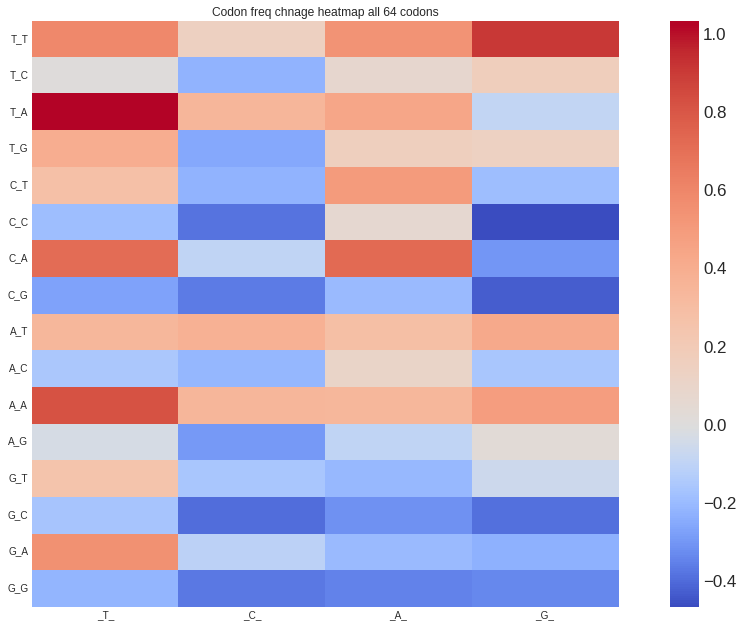

In [206]:
fig, ax = plt.subplots()
im = ax.imshow(np.array(codon_meanChangeCount_array), interpolation="nearest", cmap = shiftedColorMap(matplotlib.cm.coolwarm, codon_meanChangeCount_array), aspect =1/4)

# We want to show all ticks...
ax.set_xticks(np.arange(len(base2_axis)))
ax.set_yticks(np.arange(len(base1base3_axis)))
# ... and label them with the respective list entries
ax.set_xticklabels(base2_axis)
ax.set_yticklabels(base1base3_axis)

# Rotate the tick labels and set their alignment.
# plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#          rotation_mode="anchor")

# for i in range(len(base1base3_axis)):
#     for j in range(len(base2_axis)):
#         text = ax.text(j, i, np.array(codon_meanChangeCount_array)[i, j],
#                        ha="center", va="center", color="k")


ax.grid(False)
ax.set_title("Codon freq chnage heatmap all 64 codons")
#fig.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

fig.colorbar(im).ax.tick_params(labelsize=17)
plt.show()

# ** creating mean chnage for each a.a. ** 

In [2]:
SynonymousCodons = {'CYS': ['TGT', 'TGC'], 'ASP': ['GAT', 'GAC'],
'SER': ['TCT', 'TCG', 'TCA', 'TCC', 'AGC', 'AGT'],
'GLN': ['CAA', 'CAG'], 'MET': ['ATG'], 'ASN': ['AAC', 'AAT'],
'PRO': ['CCT', 'CCG', 'CCA', 'CCC'], 'LYS': ['AAG', 'AAA'],
'STOP': ['TAG', 'TGA', 'TAA'], 'THR': ['ACC', 'ACA', 'ACG', 'ACT'],
'PHE': ['TTT', 'TTC'], 'ALA': ['GCA', 'GCC', 'GCG', 'GCT'],
'GLY': ['GGT', 'GGG', 'GGA', 'GGC'], 'ILE': ['ATC', 'ATA', 'ATT'],
'LEU': ['TTA', 'TTG', 'CTC', 'CTT', 'CTG', 'CTA'], 'HIS': ['CAT', 'CAC'],
'ARG': ['CGA', 'CGC', 'CGG', 'CGT', 'AGG', 'AGA'], 'TRP': ['TGG'],
'VAL': ['GTA', 'GTC', 'GTG', 'GTT'], 'GLU': ['GAG', 'GAA'], 'TYR': ['TAT', 'TAC']}

In [5]:
aa_mean_change = {}

for aa, codon_list in SynonymousCodons.items(): 
    aa_current_chnage_list = []
    for trial_number in range(nTrials): 
        sum_i = 0
        sum_f = 0
        for syn_codon in codon_list: 
            
            sum_i += count_change_dictionary[syn_codon][0][trial_number]
            sum_f += count_change_dictionary[syn_codon][1][trial_number]
        aa_current_chnage_list.append((sum_f-sum_i)/sum_i)
    aa_mean_change[aa] = aa_current_chnage_list

NameError: name 'count_change_dictionary' is not defined

** saving to df ** 

In [190]:
aa_mean_change_df = pd.DataFrame.from_dict(aa_mean_change)
timestamp = datetime.now().strftime("%Y/%m/%d").replace("/", "_").replace(":", "_")
aa_mean_change_df.to_csv("aa_mean_change_{t}.csv".format(t=timestamp))

# ** making the heatmap but for a.a.s ** 

In [181]:
SynonymousCodons_rev = {}
for aa_key, codon_list in SynonymousCodons.items(): 
    for codon in codon_list: 
        SynonymousCodons_rev[codon] = aa_key

In [196]:
#making the list of mean chnage counts for each triplet in the order for "triplets" 
aa_meanChangeCount_array = []
for base1 in bases: 

    for base3 in bases:
        aa_counts_list = []
        
        for base2 in bases: 
            codon = base1+base2+base3
            aa = SynonymousCodons_rev[codon]
            aa_counts_list.append(np.mean(aa_mean_change[aa]))
        
        
        aa_meanChangeCount_array.append(aa_counts_list)
    

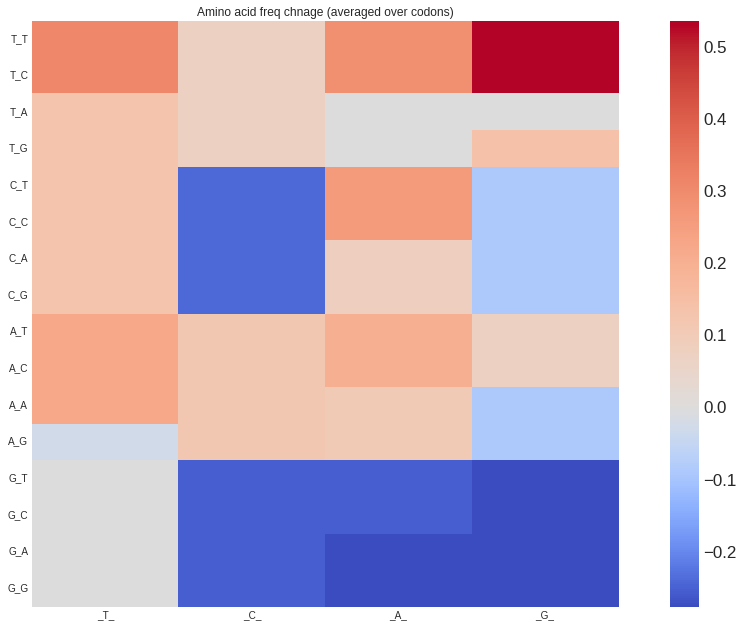

In [209]:
fig, ax = plt.subplots()
im = ax.imshow(np.array(aa_meanChangeCount_array), interpolation="nearest", cmap = shiftedColorMap(matplotlib.cm.coolwarm, aa_meanChangeCount_array), aspect =1/4)

# We want to show all ticks...
ax.set_xticks(np.arange(len(base2_axis)))
ax.set_yticks(np.arange(len(base1base3_axis)))
# ... and label them with the respective list entries
ax.set_xticklabels(base2_axis)
ax.set_yticklabels(base1base3_axis)

# Rotate the tick labels and set their alignment.
# plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#          rotation_mode="anchor")

# for i in range(len(base1base3_axis)):
#     for j in range(len(base2_axis)):
#         text = ax.text(j, i, np.array(codon_meanChangeCount_array)[i, j],
#                        ha="center", va="center", color="k")


ax.grid(False)
ax.set_title("Amino acid freq chnage (averaged over codons)")
#fig.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

fig.colorbar(im).ax.tick_params(labelsize=17)
plt.show()